(150, 4)
(150,)


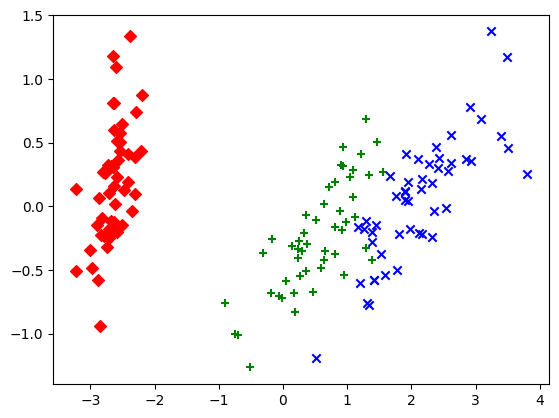

In [8]:
#第一步：装载数据
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
#第二步：PCA降维
from sklearn.decomposition import PCA

PCA_X = PCA(n_components=2)
reduced_X = PCA_X.fit_transform(X)
#第三步：对降维后的数据进行二维可视化
import matplotlib.pyplot as plt

plt.scatter(reduced_X[y == 0, 0], reduced_X[y == 0, 1], color='r', marker='D')
plt.scatter(reduced_X[y == 1, 0], reduced_X[y == 1, 1], color='g', marker='+')
plt.scatter(reduced_X[y == 2, 0], reduced_X[y == 2, 1], color='b', marker='x')

In [101]:
#第一步：装载数据
from sklearn.datasets import load_iris
import numpy as np

load_data = load_iris()
x = load_data.data
y = load_data.target
print(x[:10])
#第二步：数据集划分并标准化
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
#第三步：KNN训练并预测
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier(n_neighbors=5, weights=uniform, algorithm=auto, p=2)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
result = knn.predict(x_test)
#第四步：输出结果
r_result = knn.score(x_test, y_test)
print("训练的结果为：", result)
print("正确的结果为：", y_test)
print("识别成功率为：", r_result)
# 预测花萼长5cm宽3cm 花瓣长1cm宽0.5cm品种
X_new = np.array([[5, 3, 1, 0.5]])
prediction = knn.predict(X_new)
print("这个鸢尾花的品种为：{}".format(load_data['target_names'][prediction]))


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
训练的结果为： [2 2 2 1 1 1 1 2 1 0 0 0 2 1 1 2 1 2 2 2 0 0 0 2 1 1 2 0 2 0 0 1 0 2 1 2 2
 2]
正确的结果为： [2 2 2 1 1 1 1 2 1 0 0 0 2 1 2 2 1 2 2 2 0 0 0 2 1 2 2 0 2 0 0 1 0 2 1 2 2
 2]
识别成功率为： 0.9736842105263158
这个鸢尾花的品种为：['virginica']


In [3]:
#第一步：装载数据
import numpy as np

X = np.array([
    [182, 80, 1],
    [177, 70, 1],
    [160, 59, 0],
    [154, 54, 0],
    [165, 65, 1],
    [192, 90, 1],
    [174, 64, 0],
    [176, 70, 0],
    [158, 54, 0],
    [172, 76, 1]
])
y = [44, 43, 38, 37, 40, 47, 39, 40, 37, 42]
k = 5
#第二步：KNN训练
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(k)
knn.fit(X, y)
#第三步：数据预测
X_test = np.array([
    [174, 59, 0],
    [174, 75, 1]
])
predictions = knn.predict(X_test)
print("预测的鞋号为：", predictions)


预测的鞋号为： [40.  41.6]


当前的准确率为 :0.92 当前K的取值为 :1
当前的准确率为 :0.93 当前K的取值为 :3
当前的准确率为 :0.92 当前K的取值为 :5
当前的准确率为 :0.91 当前K的取值为 :7
当前的准确率为 :0.92 当前K的取值为 :9
当前的准确率为 :0.92 当前K的取值为 :11
当前的准确率为 :0.92 当前K的取值为 :13
当前的准确率为 :0.92 当前K的取值为 :15
当前的准确率为 :0.92 当前K的取值为 :17
当前的准确率为 :0.92 当前K的取值为 :19
当前的准确率为 :0.92 当前K的取值为 :21
当前的准确率为 :0.92 当前K的取值为 :23
当前的准确率为 :0.91 当前K的取值为 :25
当前的准确率为 :0.92 当前K的取值为 :27
当前的准确率为 :0.92 当前K的取值为 :29


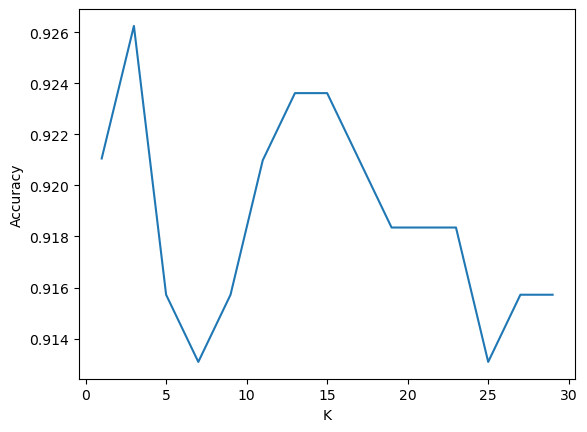

In [4]:
#第一步：装载数据
from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
#第二部：数据集划分
from sklearn.model_selection import train_test_split, cross_val_score

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=1 / 3, random_state=3)
#第三步：选择模型进行K折交叉验证
k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
cv_scores = []
from sklearn.neighbors import KNeighborsClassifier

for n in k_range:
    knn = KNeighborsClassifier(n)
    scores = cross_val_score(knn, train_X, train_y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    print("当前的准确率为 :%.2f" % scores.mean(), "当前K的取值为 :%d" % n)
#第四步：结果显示
import matplotlib.pyplot as plt

plt.plot(k_range, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
